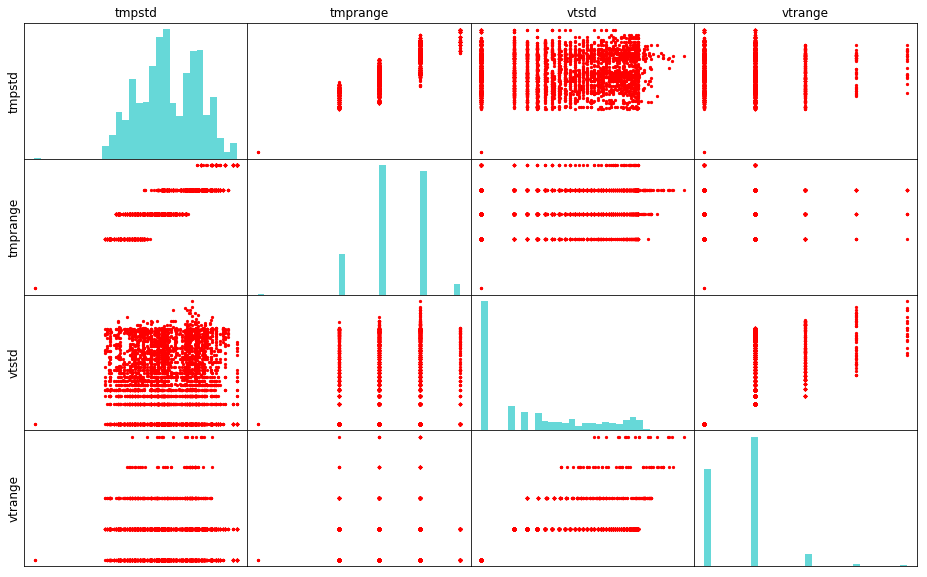

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os,xlrd
 
def readlist(path,sheet,col):   #读组电压  参数为 路径 表格 数列
    
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    value.pop(0)
    dataframe=[]
    for i in value:
        dt=[]
        for j in i.split(';'):
            dt.append(int(j))
        dataframe.append(dt)
    return dataframe

def correlation_analysis(datalist,labels):                              
    n=len(labels)
    fig,axes=plt.subplots(n,n,sharex=False,sharey=False)
    fig.set_size_inches(16,10)
    plt.subplots_adjust(wspace=0,hspace=0)
    for i in range(n):
        for j in range(n):
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            if i==0:
                axes[i,j].set_title(labels[j],fontsize='large')
            if j==0:
                axes[i,j].set_ylabel(labels[i],fontsize='large')
            if i==j:
                axes[i,i].hist(datalist[i],30,color='c',alpha=0.6)
            else:
                axes[i,j].scatter(datalist[j],datalist[i],marker='.',s=20,color='r',alpha=1)

def badpop(lt):              #去坏值
    i=0
    p=[]
    pop=[]
    mean=np.mean(lt)
    std=np.std(lt)
    for x in lt:
        if abs(mean-x)>std*3:
            p.append(i)
        i+=1
    for i in range(len(p)):
        pop.append(p[i]-i)
    return pop                
                
path=u'data/vehicle-京B7Y242-20150416133936.xls'
tmp=readlist(path,3,3)
vt=readlist(path,4,3)

tmpstd=[]
tmprg=[]
vtstd=[]
vtrg=[]
for i in tmp:
    tmpstd.append(np.std(i))
    tmprg.append(max(i)-min(i))
for i in vt:
    vtstd.append(np.std(i))
    vtrg.append(max(i)-min(i))
datalist=[tmpstd,tmprg,vtstd,vtrg]
labels=['tmpstd','tmprange','vtstd','vtrange']


bad=badpop(datalist[2])
for j in range(len(bad)):
    datalist[0].pop(bad[j]) 
    datalist[1].pop(bad[j]) 
    datalist[2].pop(bad[j]) 
    datalist[3].pop(bad[j]) 
        
correlation_analysis(datalist,labels)

与其他电池电压一致性较差的电池有：
第2号电池，其电压偏差的均方差为106.63毫安
第8号电池，其电压偏差的均方差为107.81毫安


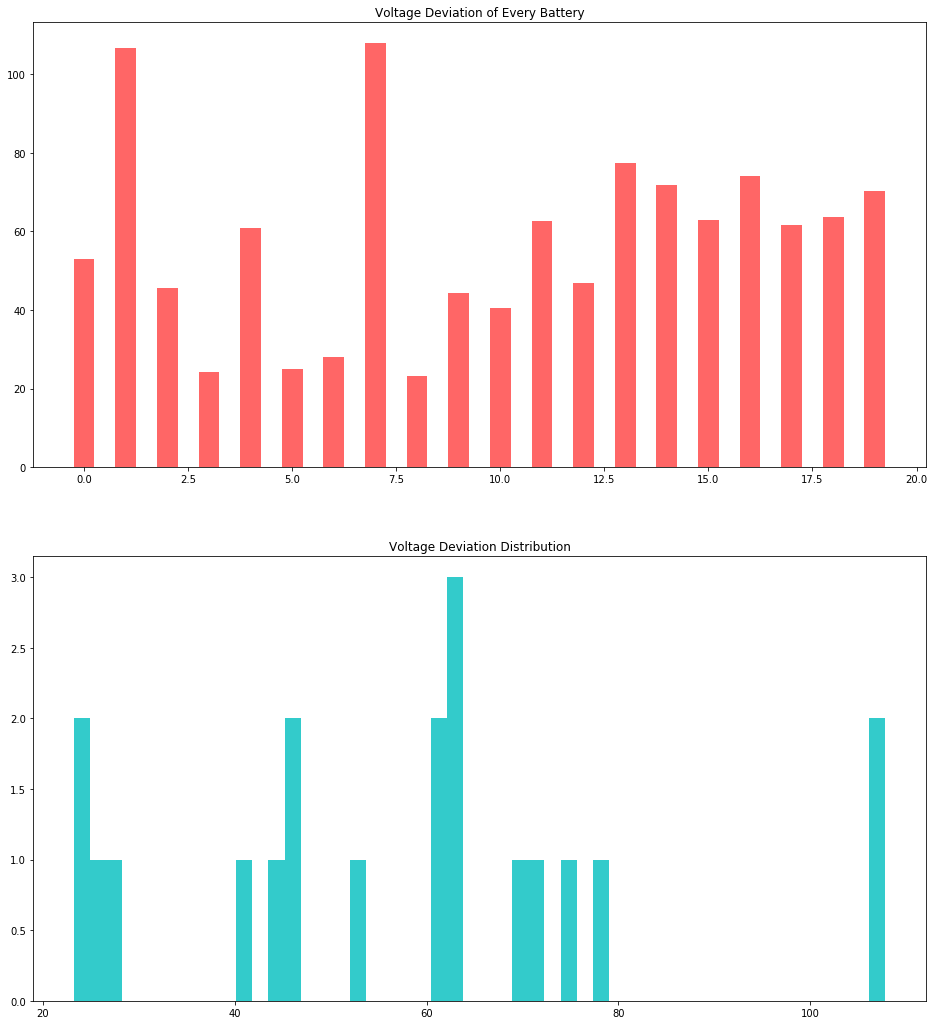

In [7]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os,xlrd
 
def readlist(path,sheet,col):   #读组电压  参数为 路径 表格 数列
    
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    value.pop(0)
    dataframe=[]
    for i in value:
        dt=[]
        for j in i.split(';'):
            dt.append(int(j))
        dataframe.append(dt)
    return dataframe

path=u'data/vehicle-京B7Y219-20150416110148.xls'
data=readlist(path,3,3)


ex=[]                               #各时间段电池组电压均值
voltage=[]
for value in data:
    s=0
    for i in value:
        s+=i
    e=float(s)/len(value)
    ex.append(e)

for j in range(len(data[0])):           #单个电池与均值差值总和
    s=0
    for i in range(len(data)):
        s+=np.square((data[i][j]-ex[i]))
    voltage.append(round((np.sqrt(s)),2))
i=0
overvt=[]
for vt in voltage:
    i+=1
    if (vt-sum(voltage)/len(voltage))>np.std(voltage)*2:
        overvt.append([vt,i])


fig=plt.figure()
fig.set_size_inches(16,18)
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
ax1.set_title('Voltage Deviation of Every Battery',fontsize='large')
ax2.set_title('Voltage Deviation Distribution',fontsize='large')
m=ax1.bar(range(len(voltage)),voltage,0.5,color='r',alpha=0.6)
n=ax2.hist(voltage,50,color='c',alpha=0.8)

print (u'与其他电池电压一致性较差的电池有：')
for i in overvt:
    print (u'第%d号电池，其电压偏差的均方差为%.2f毫安'%(i[1],i[0]))

In [9]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os,xlrd
 
def readata(path,sheet,col,chop,str=0):   
    dt=[]
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    value.pop(0)
    for val in value:
        if str == 1:
            dt.append(val)
        elif chop==0:
            dt.append(float(val.encode('utf-8')))
        else:
            dt.append(float(val[:-chop].encode('utf-8')))
    return dt

def getpath(dir):
    path=[]
    for file in os.listdir(dir):
        if file[:7]=='vehicle':
            path.append(os.path.join(dir,file))
    return path               
            
maxtmp=[]            
dir=u'data/'
for file in getpath(dir):
    tmp=readata(file,0,12,2)
    maxtmp.append(np.max(tmp))
for i in range(len(maxtmp)):
    print(u'%s 的电池最大温度值为%.0f℃'%(getpath(dir)[i][28:35],maxtmp[i]))

6134541 的电池最大温度值为20℃
6103338 的电池最大温度值为22℃
6133043 的电池最大温度值为23℃
6130603 的电池最大温度值为19℃
6095100 的电池最大温度值为22℃
6110715 的电池最大温度值为22℃
6134258 的电池最大温度值为24℃
6111443 的电池最大温度值为24℃
6125313 的电池最大温度值为21℃
6102410 的电池最大温度值为20℃
6130530 的电池最大温度值为24℃
6131838 的电池最大温度值为23℃
6124647 的电池最大温度值为23℃
6125050 的电池最大温度值为19℃
6111958 的电池最大温度值为24℃
6103113 的电池最大温度值为19℃
6100322 的电池最大温度值为23℃
6104327 的电池最大温度值为19℃
6130523 的电池最大温度值为26℃
6101135 的电池最大温度值为23℃
6123535 的电池最大温度值为21℃
6112241 的电池最大温度值为20℃
6133730 的电池最大温度值为26℃
6095012 的电池最大温度值为16℃
6131321 的电池最大温度值为23℃
6103731 的电池最大温度值为18℃
6094032 的电池最大温度值为20℃
6093720 的电池最大温度值为20℃
6133804 的电池最大温度值为23℃
6130822 的电池最大温度值为25℃
6112550 的电池最大温度值为24℃
6103001 的电池最大温度值为27℃
6124903 的电池最大温度值为19℃
6102313 的电池最大温度值为23℃
6132926 的电池最大温度值为18℃
6130020 的电池最大温度值为12℃
6134444 的电池最大温度值为23℃
6100813 的电池最大温度值为22℃
6124511 的电池最大温度值为24℃
6131315 的电池最大温度值为24℃
6103756 的电池最大温度值为22℃
6122832 的电池最大温度值为21℃
6133714 的电池最大温度值为19℃
6101104 的电池最大温度值为21℃
6131129 的电池最大温度值为18℃
6101148 的电池最大温度值为22℃
6131532 的电池最大温度值为25℃
6133455 的电池最大